# Time Series Analysis

### We will be using weather data to illustrate the concepts of autocorrelation, seasonality, and stationarity

## Data

fedesoriano. (August 2022). Electric Power Consumption. Retrieved [Date Retrieved] from https://www.kaggle.com/datasets/fedesoriano/electric-power-consumption.

The data consists of 52,416 observations of energy consumption and weather data on a 10-minute window in the city of Tetouan, Morocco. Every observation is described by 9 feature columns.


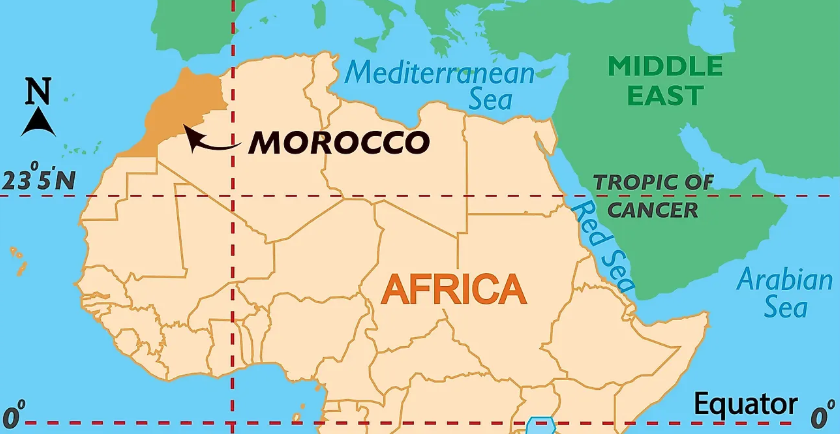

In [1]:
#Import Libraries and data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics import tsaplots
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
%matplotlib inline

In [2]:
#Import data from Kaggle
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "powerconsumption.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "fedesoriano/electric-power-consumption",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-1688912621.py:11: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 1.36M/1.36M [00:00<00:00, 1.85MB/s]

Extracting zip of powerconsumption.csv...


First 5 records:         Datetime  Temperature  Humidity  WindSpeed  GeneralDiffuseFlows  \
0  1/1/2017 0:00        6.559      73.8      0.083                0.051   
1  1/1/2017 0:10        6.414      74.5      0.083                0.070   
2  1/1/2017 0:20        6.313      74.5      0.080                0.062   
3  1/1/2017 0:30        6.121      75.0      0.083                0.091   
4  1/1/2017 0:40        5.921      75.7      0.081                0.048   

   DiffuseFlows  PowerConsumption_Zone1  PowerConsumption_Zone2  \
0         0.119             34055.69620             16128.87538   
1         0.085             29814.68354             19375.07599   
2         0.100             29128.10127             19006.68693   
3         0.096             28228.86076             18361.09422   
4         0.085             27335.69620             17872.34043   

   PowerConsumption_Zone3  
0             20240.96386  
1             20131.08434  
2             19668.43373  
3             188

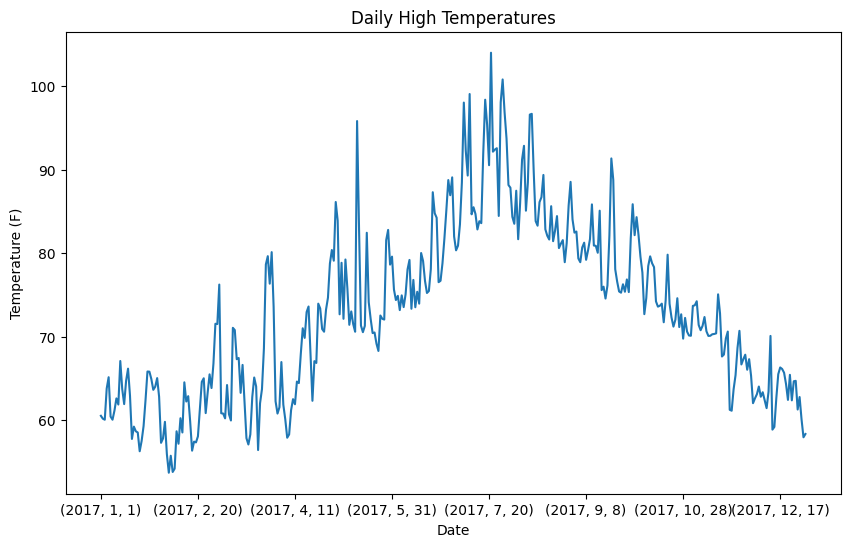

In [3]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

#Start with a basic line plot of temperature
df['Day']= df['Datetime'].dt.day
df['Month']= df['Datetime'].dt.month
df['Year']= df['Datetime'].dt.year
df['Hour']= df['Datetime'].dt.hour

#Convert temperature to fahrenheit
df['Temperature_F'] = df['Temperature'] * 9/5 + 32

#Converting raw frequent readings into a daily series
daily_high = df.groupby(['Year', 'Month', 'Day']).max()['Temperature_F']

plt.figure(figsize=(10,6))
daily_high.plot()
plt.title('Daily High Temperatures')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.show()




<Axes: xlabel='Hour'>

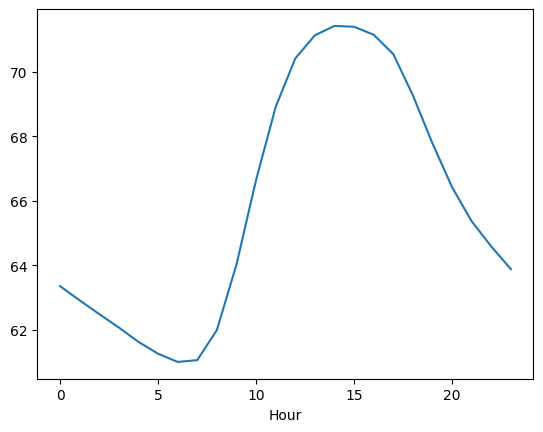

In [4]:
#Compute mean temperature for each hour
hourly_avg = df.groupby('Hour').mean()['Temperature_F']
hourly_avg.plot()

#Does plot show seasonality?

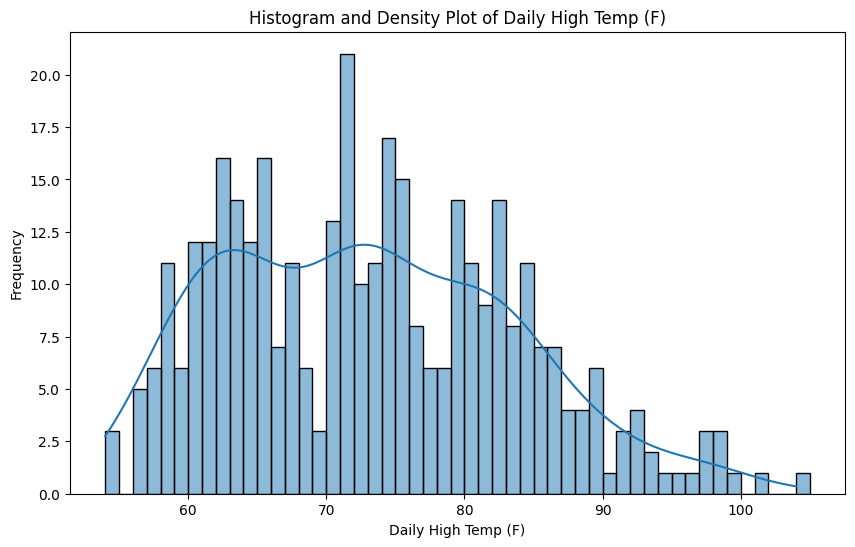

In [5]:
#Density Plot
# Round to whole degrees (integer bins)
daily_high_int = daily_high.round(0).astype(int)

# Plot histogram with KDE (density curve)
plt.figure(figsize=(10,6))
sns.histplot(
    daily_high_int,
    bins=range(daily_high_int.min(), daily_high_int.max() + 2),  # one bin per degree
    kde=True
)

plt.title("Histogram and Density Plot of Daily High Temp (F)")
plt.xlabel("Daily High Temp (F)")
plt.ylabel("Frequency")
plt.show()

<Axes: >

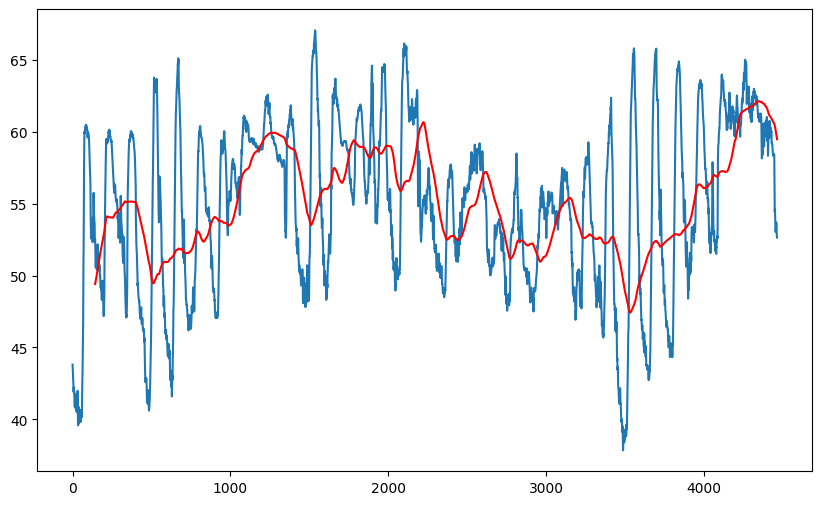

In [6]:
jan_data = df.head(4464)
plt.figure(figsize=(10,6))
jan_data['Temperature_F'].plot()
#Plot rolling mean to reveal trend beneath the noise
jan_data['Temperature_F'].rolling(144).mean().plot(color='red') #24 hours x 6 readings/hour = 144 readings/day

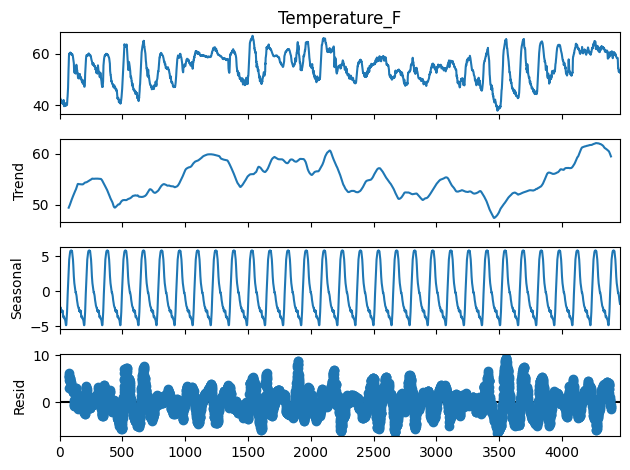

In [7]:
#Decompose January Temperatures (trend vs repeating pattern vs randomness)
result= seasonal_decompose(jan_data['Temperature_F'], model='additive', period=144)
result.plot()
plt.show()
#Do you see any similarities between this graph and the previous one?

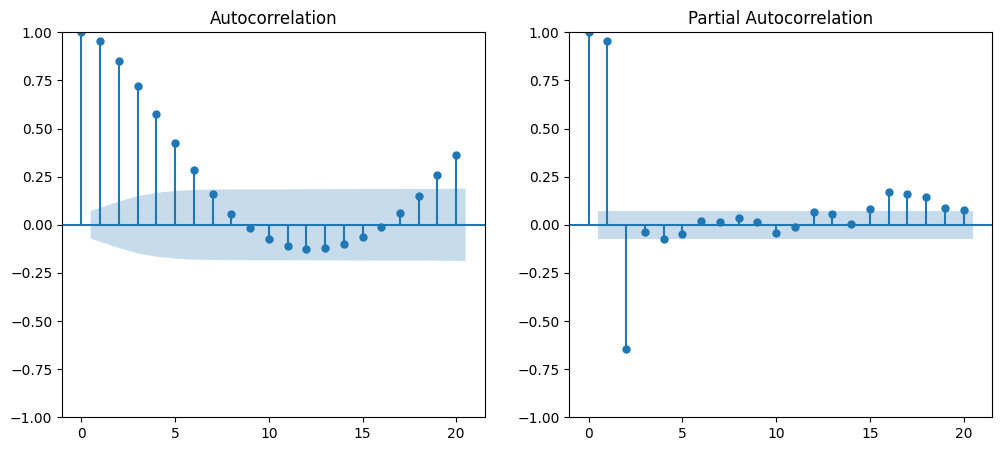

In [8]:
hourly = jan_data.groupby(['Year', 'Month', 'Day', 'Hour']).mean()['Temperature_F']

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(hourly, lags=20, ax=axes[0])
plot_pacf(hourly, lags=20, ax=axes[1])
plt.show()

# Challenge Time!
We are challenging you to work with a new time series feature:
PowerConsumption_Zone1.

Your goal is to visualize the trend and reduce short-term noise by creating a line plot with a rolling mean, using the same approach you saw earlier with temperature. Compare your plot to the reference provided

Once you've done that, challenge yourself to create an ACF plot and a PACF plot for this feature. Use these plots to think about how past values influence current power consumption over time.

If you get stuck, feel free to ask for help!

In [9]:
# Step 1: Create a line plot of daily average PowerConsumption_Zone1 and apply a rolling mean
# to smooth short-term noise and highlight the overall trend in power usage over time.

daily_avg = df.groupby(['Year', 'Month', 'Day']).mean().reset_index()

In [10]:
# Step 2: Generate ACF and PACF plots for PowerConsumption_Zone1 to explore how
# past values influence current power consumption and identify short-term dependencies.


Based on the rolling mean and the ACF/PACF plots, does power consumption appear to have short-term persistence, long-term trends, or both?

# Answer

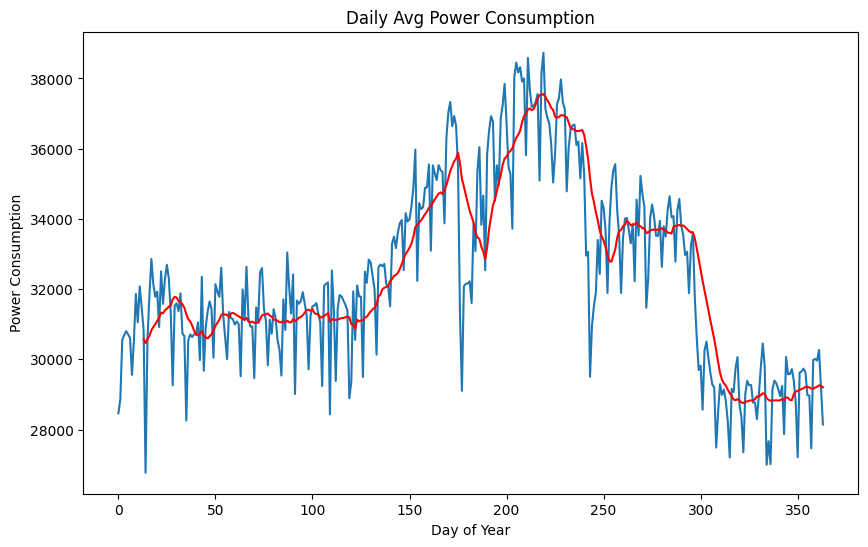

In [11]:
#Trend smoothing over 14 day cycle
daily_avg = df.groupby(['Year', 'Month', 'Day']).mean().reset_index()

plt.figure(figsize=(10,6))
daily_avg['PowerConsumption_Zone1'].plot()
daily_avg['PowerConsumption_Zone1'].rolling(14).mean().plot(color='red')
plt.title('Daily Avg Power Consumption')
plt.xlabel('Day of Year')
plt.ylabel('Power Consumption')
plt.show()

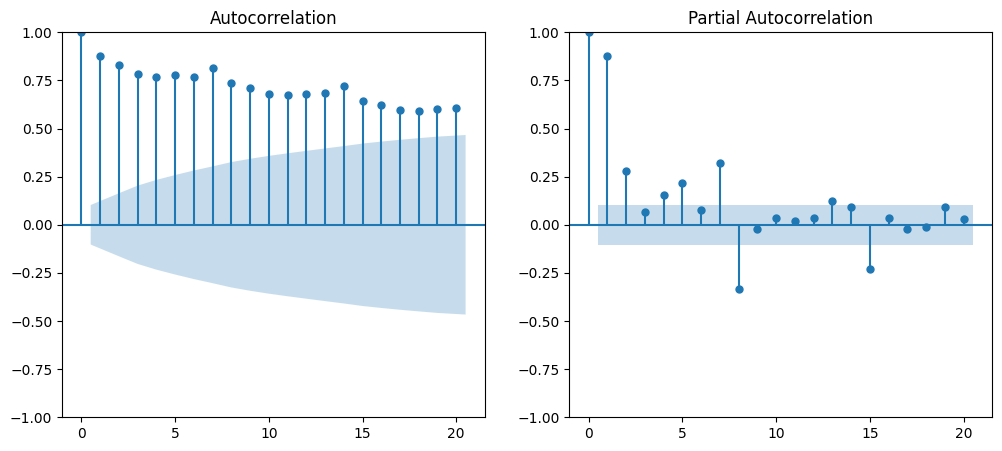

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

plot_acf(daily_avg['PowerConsumption_Zone1'], lags=20, ax=axes[0])

plot_pacf(daily_avg['PowerConsumption_Zone1'], lags=20, ax=axes[1])

plt.show()

# ------------------------------------- Extra Stuff -------------------------------

,Year,Month,Day,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3,Hour,Temperature_F,Day of Week
0,2017,1,1,2017-01-01 11:55:00,9.675299,68.519306,0.315146,121.390771,25.993924,28465.232067,17737.791287,17868.795181,11.5,49.415537,0
1,2017,1,2,2017-01-02 11:55:00,12.476875,71.456319,0.076563,120.404486,27.227410,28869.493671,19557.725431,17820.763053,11.5,54.458375,1
2,2017,1,3,2017-01-03 11:55:00,12.100000,74.981667,0.076715,120.686014,28.574660,30562.447257,20057.269504,17620.803213,11.5,53.780000,2
3,2017,1,4,2017-01-04 11:55:00,10.509479,75.459792,0.082417,122.959319,28.827222,30689.831224,20102.077001,17673.694779,11.5,50.917063,3
4,2017,1,5,2017-01-05 11:55:00,10.866444,71.040486,0.083896,118.749861,29.741437,30802.911393,20033.941237,17664.176707,11.5,51.559600,4


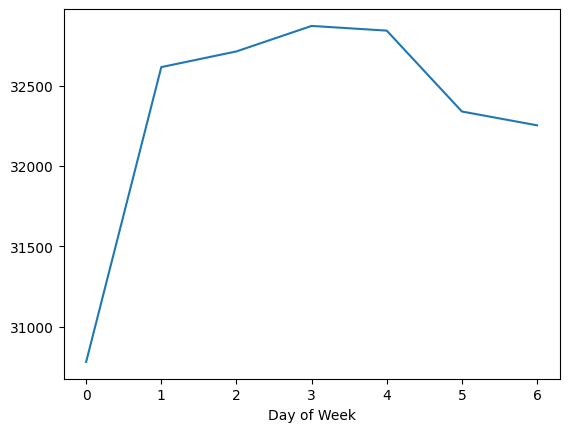

In [13]:
daily_avg['Day of Week'] = daily_avg.index % 7
daily_avg.groupby('Day of Week').mean()['PowerConsumption_Zone1'].plot()
daily_avg.head()

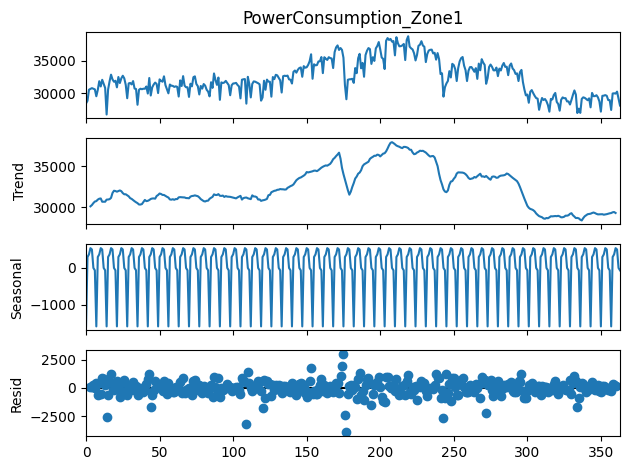

In [14]:
result= seasonal_decompose(daily_avg['PowerConsumption_Zone1'], model='additive', period=7)
result.plot()
plt.show()